In [22]:
'''
    比较由探空气球测量的得到的大气温度数据和微波辐射计反演得到的大气温度数据之间的差异
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import math
import draw_photo_module
# from draw_photo_module import draw_Linechart_photo
# --------------------------------------------
filepath_1 = r'I:\Data\Personal Data\graduation project\SACOL\original_data\200712\sounding_data_as_MWR_format_200712.txt'
filepath_2 = r'I:\Data\Personal Data\graduation project\SACOL\microwave\2007\200712.csv'

In [23]:
# 世界时
# 探空气球数据
data_1 = pd.read_csv(filepath_1,sep='  ')
# O_data_1 = data_1.iloc[1:2,0:48]
EL = 2007120200
O_data_1 = data_1.loc[data_1['Time']==EL]

In [24]:
# 北京时 = 世界时 + 8
# 微波辐射计数据
data_2 = pd.read_csv(filepath_2)
O_data_2 = data_2.loc[data_2['Date/Time']=='20071202_W08:00']
# parameter = 11
# a = data_2.loc[data_2['10']==parameter]
# Del_columns = data_2.columns[2:10]
# a.drop(Del_columns,axis=1,inplace=True)
# a.drop('Record',axis=1,inplace=True)
# z = a.iloc[:,0:48]
# O_data_2 = z.loc[z['Date/Time']=='12/02/07 08:00:19']

In [25]:
O_data_2.columns = O_data_1.columns
data = O_data_2
data = data.append(O_data_1)
photoname = 'WorldTime' + str(EL)
np_data = np.array(data)

In [26]:
def calculate_MSE(ex_data):
    i = 1
    sum = 0
    flag = 1
    while flag < np.shape(ex_data)[1]:
        print(flag)
        while i < flag:
            sum = sum + (ex_data[0,i] - ex_data[1,i]) ** 2
            i = i + 1
        MSE = sum/(np.shape(ex_data)[1] - 1)
        # return MSE
        flag = flag + 1

In [27]:
# calculate_MSE(np_data)

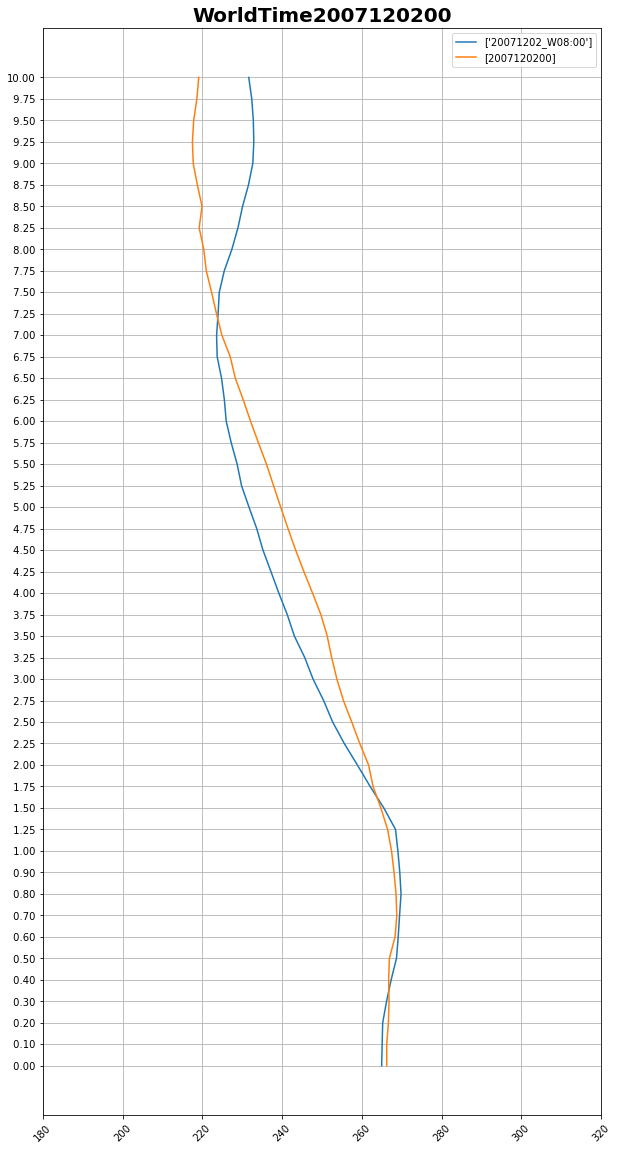

In [28]:
# 可视化比较
draw_photo_module.draw_Linechart_photo(data,photoname)